In [2]:
 import cv2
import matplotlib.pyplot as plt
from skimage.exposure import rescale_intensity
import numpy as np
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
def catimageShow(imageTitle, image):
    imageVariable = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(4, 2))
    plt.imshow(imageVariable)
    plt.title(imageTitle)
    plt.show()

In [5]:
def conv(image, kernel):
    imageH, imageW = image.shape[:2]
    kernelH, kernelW = kernel.shape[:2]
    
    padding = (kernelW-1) // 2
    
    image = cv2.copyMakeBorder(image, 
                              padding, padding,
                              padding, padding, 
                              cv2.BORDER_REFLECT)
    
    
    outputmask = np.zeros((imageH, imageW), dtype= "float32")
    
    
    for y in np.arange(padding, imageH+padding):
        for x in np.arange(padding, imageW+padding):
            # ROI --> Region if Interest
            roi = image[y - padding:y+padding+1, 
                       x - padding: x+padding+1]
            k = (roi*kernel).sum()
            outputmask[y-padding, x-padding] = k
            
            
    outputmask = rescale_intensity(outputmask, in_range = (0, 255))
    outputmask = (outputmask*255).astype("uint8")
    
    return outputmask

In [6]:
imageArgs = {"image":"../input/catimages/c_a_t.jpg"}

In [7]:
imageSamllBlur = np.ones((7, 7), dtype ="float")*(1.0/(7*7))
imageLargeBlur = np.ones((21, 21), dtype ="float")*(1.0/(21*21))

In [8]:
sharpen = np.array([[0, -1, 0], 
          [-1, 5, -1], 
          [0, -1, 0]], dtype = "int")

In [9]:
image  = cv2.imread(imageArgs["image"])
grayimage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [10]:
print("Image information {}".format(image.shape))
print("\nImage information {}".format(grayimage.shape))

Image information (299, 350, 3)

Image information (299, 350)


In [11]:
convImage = conv(image, sharpen)
filtersOnImage = cv2.filter2D(grayimage, -1, sharpen)

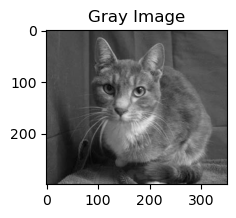

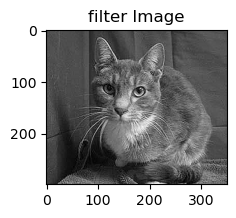

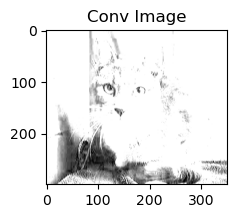

In [12]:
catimageShow("Gray Image", grayimage)
catimageShow("filter Image", filtersOnImage)
catimageShow("Conv Image", convImage)

In [13]:
emboss = np.array([[-2, 1, 0], 
          [-1, 1, 1], 
          [0, 1, 2]], dtype = "int")

In [14]:
emboosImage = conv(image, emboss)
filtersOnImage = cv2.filter2D(grayimage, -1, emboss)

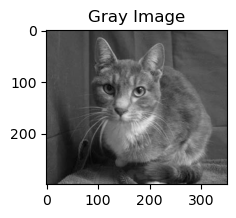

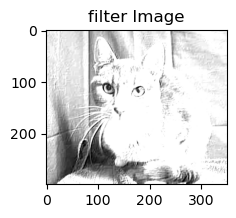

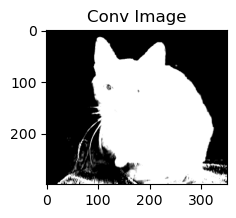

In [15]:
catimageShow("Gray Image", grayimage)
catimageShow("filter Image", filtersOnImage)
catimageShow("Conv Image", emboosImage)

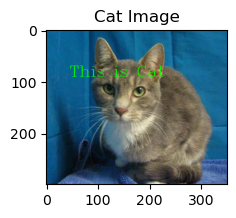

Text(0.5, 1.0, 'Image of Cat')

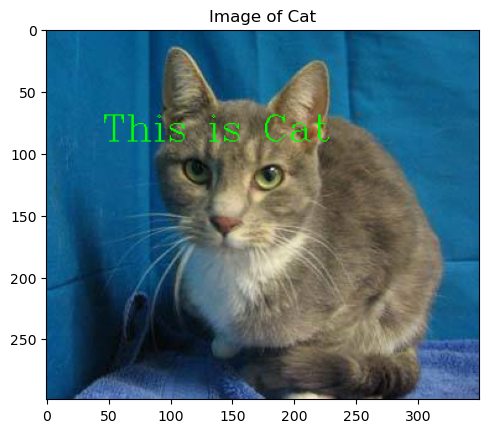

In [16]:
imageText = image.copy()
textonimage = "This is Cat"
imageCoor = (45, 90)
cv2.putText(imageText, textonimage, imageCoor, fontFace = cv2.FONT_HERSHEY_COMPLEX, 
           fontScale= 1.0,
           color = (0, 255, 0))
catimageShow("Cat Image", imageText)
#cv2.waitKey(0)
#cv2.destroyWindow("Cat Image")

image = cv2.cvtColor(imageText, cv2.COLOR_BGR2RGB)
plt.subplot(111)
plt.imshow(image)
plt.title("Image of Cat")

Text(0.5, 1.0, 'Image of Cat')

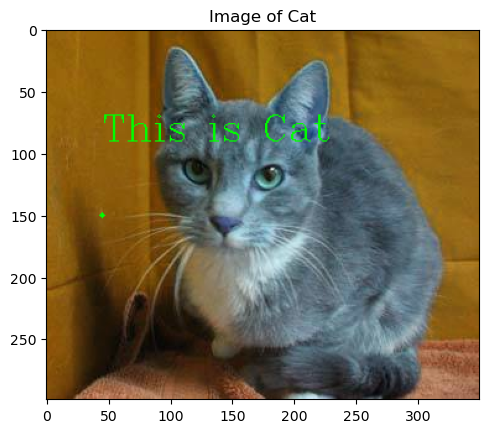

In [17]:
imageText = image.copy()
imageCoor1 = (45, 150)
imageCoor2 = (60, 190)
cv2.rectangle(imageText, imageCoor1, imageCoor1,thickness = 3, color = (0, 255, 0))
image = cv2.cvtColor(imageText, cv2.COLOR_BGR2RGB)
plt.subplot(111)
plt.imshow(image)
plt.title("Image of Cat")

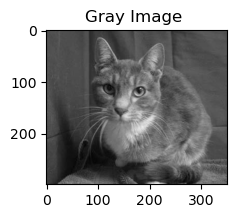

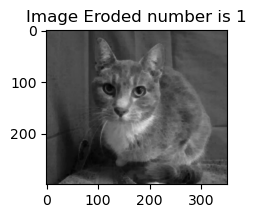

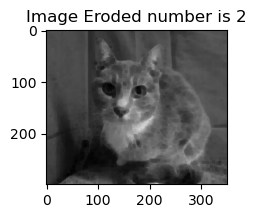

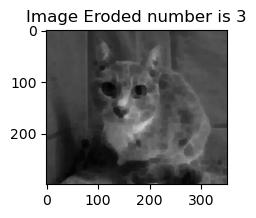

In [18]:
image=  cv2.imread(imageArgs["image"])
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
catimageShow("Gray Image ",imageGray)
for i in range(0, 3):
    imageEroded = cv2.erode(imageGray, None, iterations = i+1)
    catimageShow("Image Eroded number is {}".format(i+1), imageEroded)

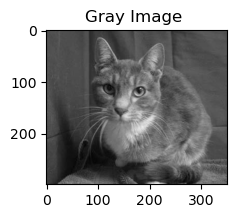

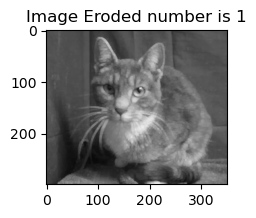

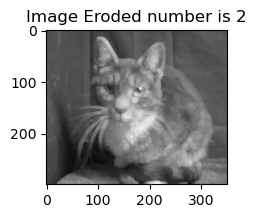

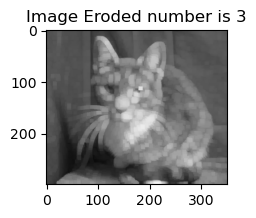

In [19]:
image=  cv2.imread(imageArgs["image"])
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
catimageShow("Gray Image ",imageGray)
for i in range(0, 3):
    imageDilated= cv2.dilate(imageGray, None, iterations = i+1)
    catimageShow("Image Eroded number is {}".format(i+1), imageDilated)

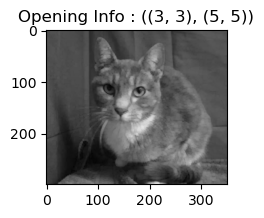

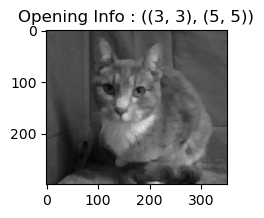

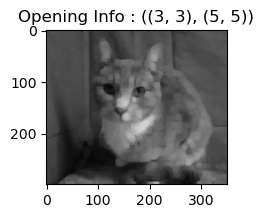

In [20]:
image=  cv2.imread(imageArgs["image"])
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
kernelSize = [(3, 3),
             (5, 5), 
              (7, 7)]

#catimageShow("Gray Image ",imageGray)
for i in kernelSize:
    k= cv2.getStructuringElement(cv2.MORPH_RECT, i)
    mo = cv2.morphologyEx(imageGray, cv2.MORPH_OPEN, k)
    catimageShow("Opening Info : ({}, {})".format(kernelSize[0], kernelSize[1]), mo)
    
#     imageEroded = cv2.erode(imageGray, None, iterations = i+1)
#     catimageShow("Image Eroded number is {}".format(i+1), imageEroded)


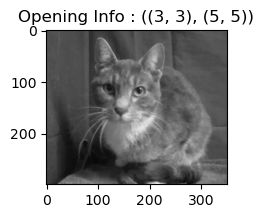

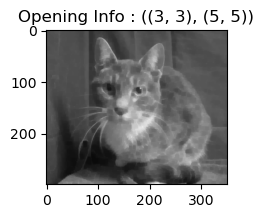

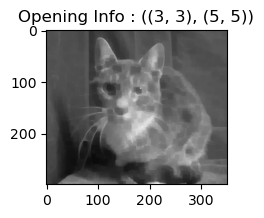

In [21]:
image=  cv2.imread(imageArgs["image"])
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
kernelSize = [(3, 3),
             (5, 5), 
              (7, 7)]

#catimageShow("Gray Image ",imageGray)
for i in kernelSize:
    k= cv2.getStructuringElement(cv2.MORPH_RECT, i)
    mo = cv2.morphologyEx(imageGray, cv2.MORPH_CLOSE, k)
    catimageShow("Opening Info : ({}, {})".format(kernelSize[0], kernelSize[1]), mo)
    
#     imageEroded = cv2.erode(imageGray, None, iterations = i+1)
#     catimageShow("Image Eroded number is {}".format(i+1), imageEroded)


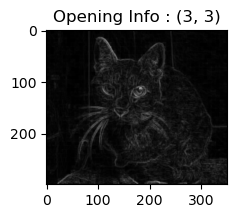

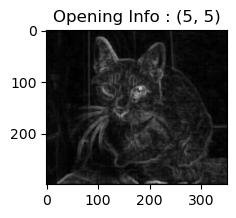

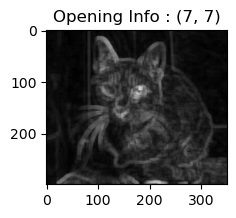

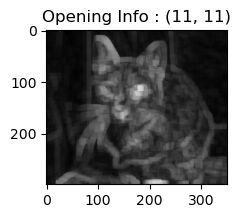

In [22]:
image=  cv2.imread(imageArgs["image"])
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
kernelSize = [(3, 3),
             (5, 5), 
              (7, 7), 
             (11, 11)]

#catimageShow("Gray Image ",imageGray)
for i in kernelSize:
    #print(i)
    k= cv2.getStructuringElement(cv2.MORPH_RECT, i)
    mo = cv2.morphologyEx(imageGray, cv2.MORPH_GRADIENT, k)
    catimageShow("Opening Info : {}".format(i), mo)
    
#     imageEroded = cv2.erode(imageGray, None, iterations = i+1)
#     catimageShow("Image Eroded number is {}".format(i+1), imageEroded)
